In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [7]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head(6)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


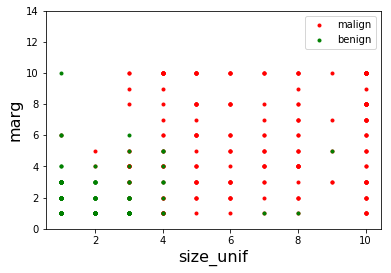

In [9]:
# Get the response.  Convert to a zero-one indicator 
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int)
Iben = (y==0)
Imal = (y==1)

# Get two predictors
xnames =['size_unif','marg'] 
X = np.array(df[xnames])

# Create the scatter plot
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

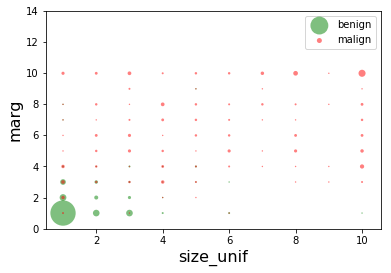

In [11]:
def plot_cnt(X,y):
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e = np.hstack((x0val,np.max(x0val)+1))
    x1e = np.hstack((x1val,np.max(x1val)+1))
    
    yval = list(set(y))
    color = ['g','r']
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        cnt, x0e,x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0,x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*cnt.ravel(), alpha=0.5, c=color[i], edgecolors='none')
    
    plt.ylim([0,14])
    plt.legend(['benign','malign'], loc='upper right')
    plt.xlabel(xnames[0], fontsize=16)
    plt.ylabel(xnames[1], fontsize=16)
    return plt

plot_cnt(X,y)

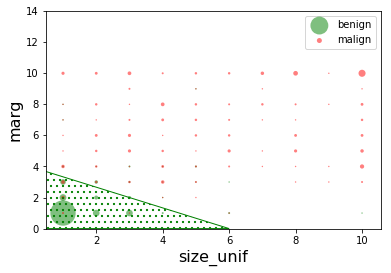

In [21]:
from matplotlib import patches
plt = plot_cnt(X,y)

ax = plt.gca() 
ax.add_patch(
    patches.Polygon([[0,0],[0,4],[6,0]],
        color='green',
        fill=False, hatch = '..'
    )
)

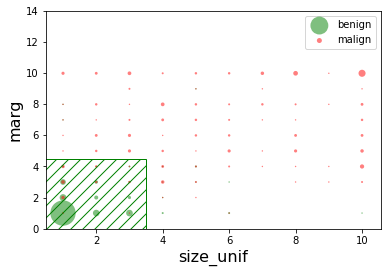

In [23]:
plt = plot_cnt(X,y)
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        width=3.5, height=4.5,  color='green',
        fill=False, hatch = '//'
    )
)

In [25]:
xnames =['size_unif','marg'] 
X = np.array(df[xnames])
y1=y-0.5 
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y1)
print('regr.intercept=',regr.intercept_)
print('regr.coef=',regr.coef_)

regr.intercept= -0.5842006662006151
regr.coef= [0.10007944 0.04197521]


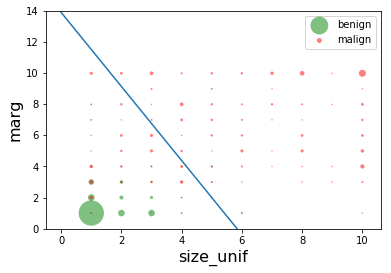

In [27]:
w0=regr.intercept_
w1=regr.coef_[0]
w2=regr.coef_[1]
plt = plot_cnt(X,y)
x1=np.zeros([11,1])
x2=np.zeros([11,1])
for i in range(11):
    x1[i]=i;
    x2[i]=(- w0-w1*i)/w2
    
plt.plot(x1, x2)

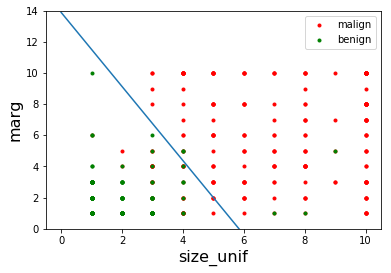

In [29]:
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')
x1=np.zeros([11,1])
x2=np.zeros([11,1])
for i in range(11):
    x1[i]=i;
    x2[i]=(- w0-w1*i)/w2
    
plt.plot(x1, x2)

In [31]:
yhat = regr.predict(X)
yhati = (yhat >=0).astype(int)
acc = np.mean(yhati ==y)
print("Accuracy on training data using two features = %f" %acc)

Accuracy on training data using two features = 0.922401


In [33]:
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
X = np.array(df[xnames])

Xs = preprocessing.scale(X)
regr.fit(Xs,y1)
yhat = regr.predict(Xs)
yhati = (yhat >=0).astype(int)
acc = np.mean(yhati == y)
print("Accuracy on training data using 10 features = %f" % acc)


Accuracy on training data using 10 features = 0.960469


In [39]:
data = {'feature': xnames, 'slope': np.squeeze(regr.coef_)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,0.089390
1,size_unif,0.066909
2,shape_unif,0.046706
3,marg,0.023596
4,cell_size,0.022381
5,bare,0.165260
6,chrom,0.046940
7,normal,0.056522
8,mit,0.001695


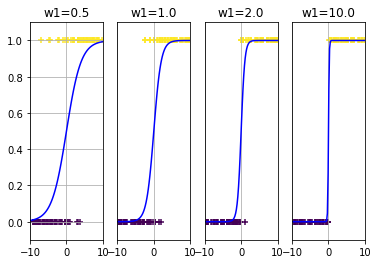

In [45]:
nx = 100
xm = 10
w1s = np.array([0.5,1,2,10])
nplot = w1s.size
iplot = 0
for w1 in w1s:
    iplot += 1
    x  = np.random.uniform(-xm,xm,nx)
    plt.subplot(1,nplot,iplot)
    py = 1/(1+np.exp(-w1*x))
    yp = np.array(np.random.rand(nx) < py)
    xp = np.linspace(-xm,xm,100)
    pyp = 1/(1+np.exp(-w1*xp))

    plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')
    plt.plot(xp,pyp,'b-')
    plt.axis([-xm,xm,-0.1,1.1])
    plt.grid()
    if (iplot > 1):
        plt.yticks([])
    plt.xticks([-10,0,10])
    plt.title('w1={0:.1f}'.format(w1))

In [47]:
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
X = np.array(df[xnames])
Xs = preprocessing.scale(X)

In [86]:
logreg = linear_model.LogisticRegression(C=1e5)

In [87]:
logreg.fit(Xs,y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [88]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print(acc)

0.9692532942898975


In [89]:
W=logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(W)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,1.508834
1,size_unif,-0.015979
2,shape_unif,0.957072
3,marg,0.947234
4,cell_size,0.214964
5,bare,1.395001
6,chrom,1.095654
7,normal,0.650696
8,mit,0.925912


In [91]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
acc = []
for train, test in kf.split(Xs):            
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9610, SE=0.0118
Recall =    0.9615, SE=0.0144
f1 =        0.9608, SE=0.0112
Accuracy =  0.9679, SE=0.0110


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

(0, 0.1)

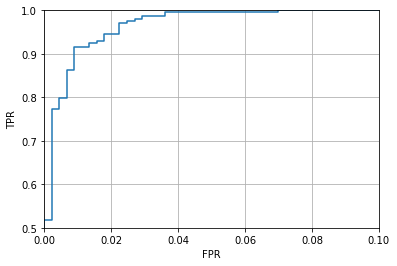

In [92]:
from sklearn import metrics
yprob = logreg.predict_proba(Xs)
fpr, tpr, thresholds = metrics.roc_curve(y,yprob[:,1])

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])


Text(0.5, 0, 'Threshold')

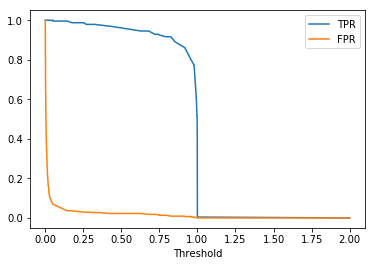

In [93]:
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')


In [94]:
auc=metrics.roc_auc_score(y,yprob[:,1])
print("AUC=%f" % auc)


AUC=0.996297


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Fold 0 C 0 num 5
Fold 0 C 0 num 6
Fold 0 C 0 num 7
Fold 0 C 0 num 8
Fold 0 C 0 num 9
Fold 0 C 0 num 9
Fold 0 C 0 num 9
Fold 0 C 0 num 9
Fold 0 C 0 num 9
Fold 0 C 0 num 8
Fold 0 C 1 num 8
Fold 0 C 2 num 8
Fold 0 C 3 num 8
Fold 0 C 5 num 8
Fold 0 C 8 num 9
Fold 0 C 14 num 9
Fold 0 C 23 num 9
Fold 0 C 37 num 9
Fold 0 C 61 num 9
Fold 0 C 100 num 9
Fold 1 C 0 num 5
Fold 1 C 0 num 6
Fold 1 C 0 num 6
Fold 1 C 0 num 7
Fold 1 C 0 num 9
Fold 1 C 0 num 9
Fold 1 C 0 num 9
Fold 1 C 0 num 9
Fold 1 C 0 num 9
Fold 1 C 0 num 8
Fold 1 C 1 num 8
Fold 1 C 2 num 8
Fold 1 C 3 num 8
Fold 1 C 5 num 8
Fold 1 C 8 num 9
Fold 1 C 14 num 9
Fold 1 C 23 num 9
Fold 1 C 37 num 9
Fold 1 C 61 num 9
Fold 1 C 100 num 9
Fold 2 C 0 num 3
Fold 2 C 0 num 6
Fold 2 C 0 num 7
Fold 2 C 0 num 7
Fold 2 C 0 num 8
Fold 2 C 0 num 9
Fold 2 C 0 num 9
Fold 2 C 0 num 9
Fold 2 C 0 num 9
Fold 2 C 0 num 9
Fold 2 C 1 num 9
Fold 2 C 2 num 9
Fold 2 C 3 num 9
Fold 2 C 5 num 9
Fold 2 C 8 num 9
Fold 2 C 14 num 9
Fold 2 C 23 num 9
Fold 2 C 37 num 9

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Fold 6 C 14 num 9
Fold 6 C 23 num 9
Fold 6 C 37 num 9
Fold 6 C 61 num 9
Fold 6 C 100 num 9
Fold 7 C 0 num 5
Fold 7 C 0 num 6
Fold 7 C 0 num 7
Fold 7 C 0 num 7
Fold 7 C 0 num 8
Fold 7 C 0 num 9
Fold 7 C 0 num 9
Fold 7 C 0 num 9
Fold 7 C 0 num 9
Fold 7 C 0 num 9
Fold 7 C 1 num 8
Fold 7 C 2 num 8
Fold 7 C 3 num 8
Fold 7 C 5 num 8
Fold 7 C 8 num 8
Fold 7 C 14 num 8
Fold 7 C 23 num 9
Fold 7 C 37 num 9
Fold 7 C 61 num 9
Fold 7 C 100 num 9
Fold 8 C 0 num 4
Fold 8 C 0 num 6
Fold 8 C 0 num 6
Fold 8 C 0 num 6
Fold 8 C 0 num 7
Fold 8 C 0 num 8
Fold 8 C 0 num 8
Fold 8 C 0 num 8
Fold 8 C 0 num 8
Fold 8 C 0 num 8
Fold 8 C 1 num 8
Fold 8 C 2 num 8
Fold 8 C 3 num 9
Fold 8 C 5 num 9
Fold 8 C 8 num 9
Fold 8 C 14 num 9
Fold 8 C 23 num 9
Fold 8 C 37 num 9
Fold 8 C 61 num 9
Fold 8 C 100 num 9
Fold 9 C 0 num 4
Fold 9 C 0 num 6
Fold 9 C 0 num 7
Fold 9 C 0 num 7
Fold 9 C 0 num 8
Fold 9 C 0 num 9
Fold 9 C 0 num 9
Fold 9 C 0 num 9
Fold 9 C 0 num 9
Fold 9 C 0 num 9
Fold 9 C 1 num 9
Fold 9 C 2 num 9
Fold 9 C 3 nu

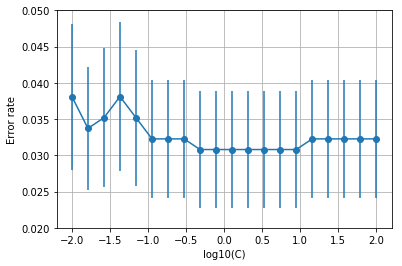

In [105]:
npen = 20
C_test = np.logspace(-2,2,npen)

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))
# Create the logistic regression object
logreg = linear_model.LogisticRegression(penalty='l1',warm_start=True)

# Loop over the folds in the cross-validation
for ifold, Ind in enumerate(kf.split(Xs)):        
            
    # Get training and test data
    Itr, Its = Ind
    Xtr = Xs[Itr,:]
    ytr = y[Itr]
    Xts = Xs[Its,:]
    yts = y[Its]
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Xts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)
        print("Fold %d C %d num %d" % (ifold,c,num_nonzerocoef[ipen,ifold]))
    
err_mean = np.mean(err_rate, axis=1)
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [107]:
err_tgt = err_mean[imin] + err_se[imin]
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print("Optimal C=%12.4e" % C_opt)
print("The test error rate = %12.4e, SE=%12.4e" % (err_mean[iopt], err_se[iopt]))

print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(1-err_mean[iopt], err_se[iopt]))


Optimal C=  1.0000e-02
The test error rate =   3.8107e-02, SE=  1.0079e-02
Accuracy =  0.9619, SE=0.0101


The number of non-zero coefficients for the optimal C = 4.200000


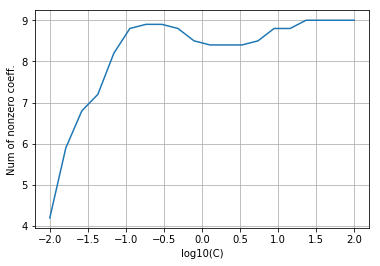

In [110]:
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
plt.plot(np.log10(C_test),num_nonzerocoef_mean)

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Num of nonzero coeff.')

print("The number of non-zero coefficients for the optimal C = %f" % num_nonzerocoef_mean[iopt])

Accuracy on the training data is 0.966325


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'l1-regularization')

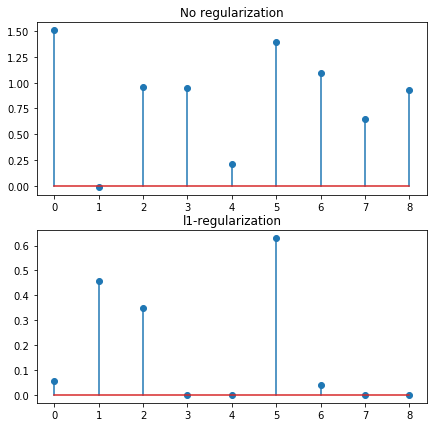

In [111]:
logreg = linear_model.LogisticRegression(C=C_opt,penalty='l1')
logreg.C= C_opt
logreg.fit(Xs,y)
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print('Accuracy on the training data is {0:f}'.format(acc))
W_l1 = logreg.coef_

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(W[0,:])
plt.title('No regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:])
plt.title('l1-regularization')